In [163]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [164]:
ticker = ['PG']
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source = 'yahoo', start = '2007-1-1', end = '2017-3-21')['Adj Close']

In [165]:
log_returns = np.log(1 + data.pct_change())

In [166]:
r = 0.025

In [167]:
stdev = log_returns.var() * 250 ** 0.5
stdev

PG    0.001971
dtype: float64

In [168]:
type(stdev)

pandas.core.series.Series

In [169]:
stdev = stdev.values
stdev

array([0.00197137])

In [172]:
T = 1
t_intervals = 250
delta_t = T / t_intervals
iterations = 10000

In [173]:
Z = np.random.standard_normal((t_intervals + 1, iterations))
S = np.zeros_like(Z)
S0 = data.iloc[-1]
S[0] = S0

In [174]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev**2)*delta_t + stdev * delta_t**0.5 * Z[t])

In [175]:
S

array([[82.69041443, 82.69041443, 82.69041443, ..., 82.69041443,
        82.69041443, 82.69041443],
       [82.69041443, 82.69041443, 82.69041443, ..., 82.69041443,
        82.69041443, 82.69041443],
       [82.69041443, 82.69041443, 82.69041443, ..., 82.69041443,
        82.69041443, 82.69041443],
       ...,
       [82.69041443, 82.69041443, 82.69041443, ..., 82.69041443,
        82.69041443, 82.69041443],
       [82.69041443, 82.69041443, 82.69041443, ..., 82.69041443,
        82.69041443, 82.69041443],
       [82.69041443, 82.69041443, 82.69041443, ..., 82.69041443,
        82.69041443, 82.69041443]])

In [176]:
S.shape

(251L, 10000L)

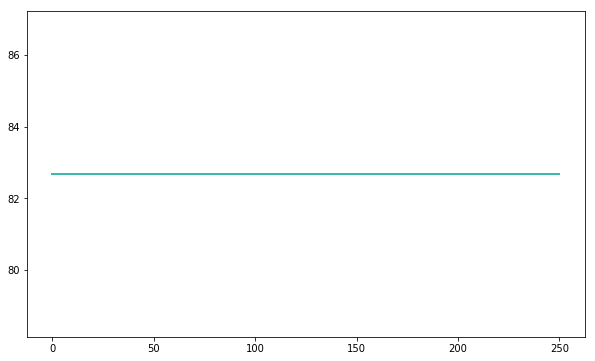

In [177]:
plt.figure(figsize=(10,6))
plt.plot(S[:, :10]);

In [178]:
p = np.maximum(S[-1] - 110, 0)

In [179]:
p

array([0., 0., 0., ..., 0., 0., 0.])

In [180]:
p.shape

(10000L,)

In [181]:
C = np.exp(-r * T) * np.sum(p) / iterations
C

0.0